#전국 관광 정보 데이터 분석하기
---
##작성자: 2023837 권건우
---
공공 데이터 포털 (https://www.data.go.kr/) 에서는,  
분류에 따라 교육,국토관리,공공행정,사회복지 등등  
폭넓은 분류에 따른 데이터가 저장되어 있습니다.

이러한 방대한 데이터 중, **"관광 정보"** 라는 주제에 관련하여  
전국에 존재하는 관광지,산책길,도시공원,지역 특화거리 등..  
다양한 데이터가 존재합니다.


학습한 이산수학의 이론을 데이터에 적용하여,  
개개인의 휴식,휴가에 관한 고민을 해소하기 위한 아이디어를 고찰하며  
이를 실현화하기 위한 프로토타입(prototype)을 구현해봅시다.

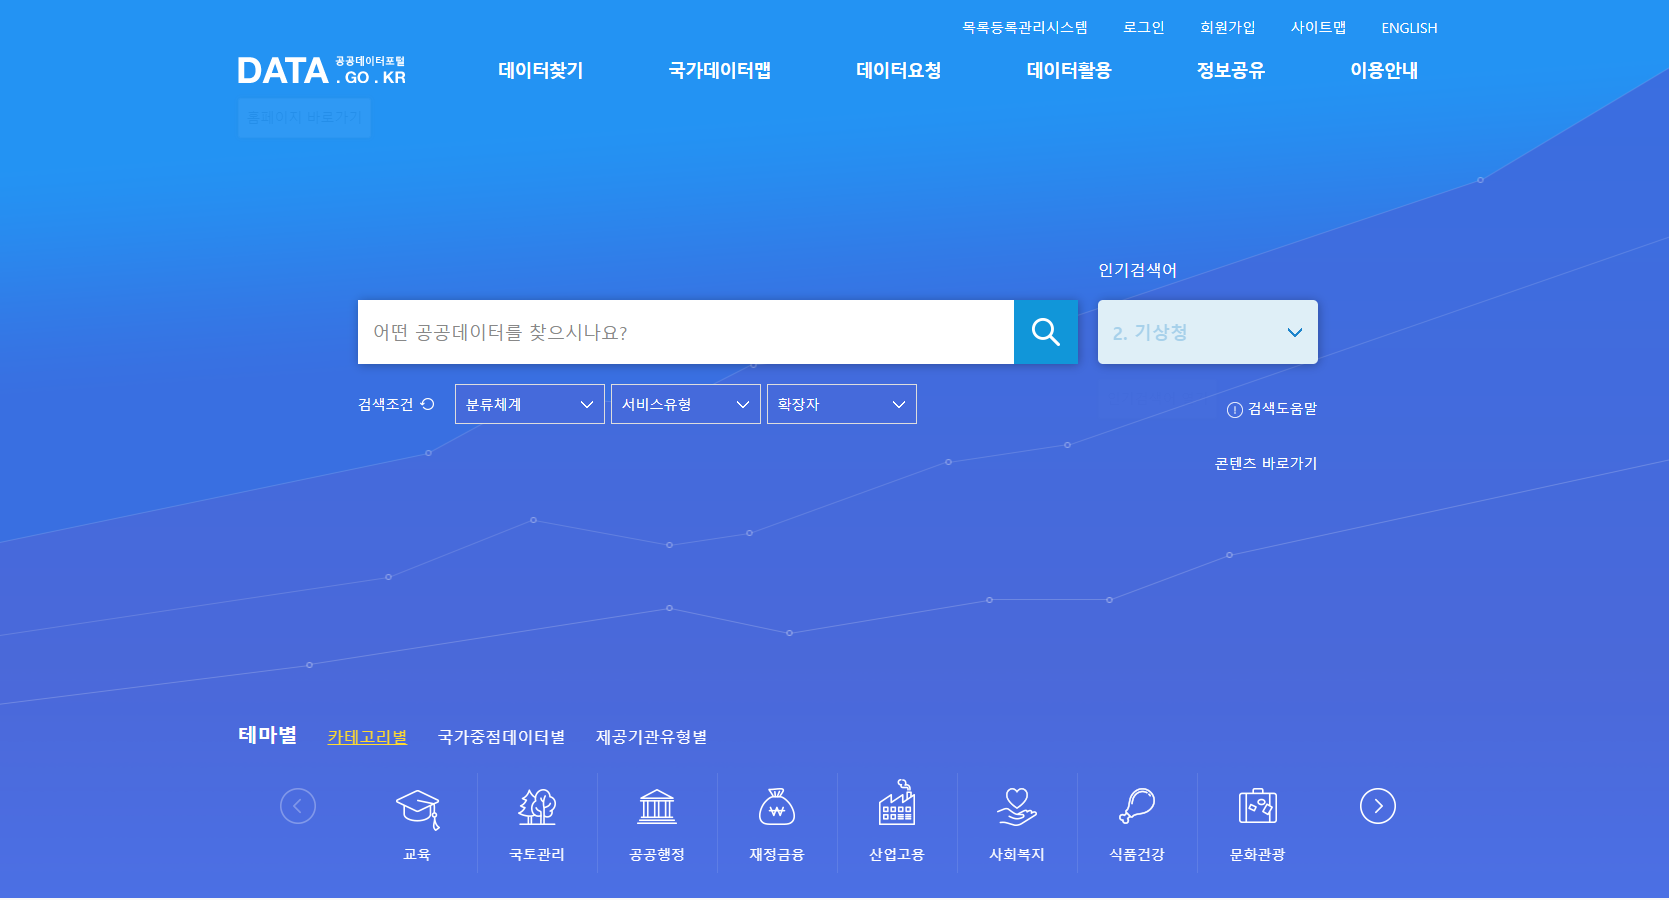

#필수확인사항
---
각 과제의 주제별로 다양한 csv파일을 활용 할 수도 있습니다.    
해당 csv파일을 다운받아 주시길 바랍니다.  

파일을 올리는 방법은 다운로드한 파일을 왼쪽 탭의 폴더 아이콘을 클릭한 뒤,  
파일을 해당 장소에 드래그앤 하거나 업로드 아이콘을 클릭하여 업로드 하시면 됩니다.


첫 번째 h/w csv 파일: (https://www.data.go.kr/data/15021141/standard.do)  
-전국 관광지 정보 표준 데이터


# HW 1. 판다스(pandas)의 데이터프레임(Dataframe) 다루기
---

그럼,  
전국엔 어떤 관광지들이 있는지 먼저 알아볼까요?    


판다스(pandas) 라는 python 라이브러리는,  
데이터 분석을 위해 널리 사용되는 라이브러리 하나입니다.



본 과제는 판다스의 데이터 프레임을 조직을 목표합니다.
csv,json 파일 읽기, 필요 데이터 추출 및 필터, 그룹화 및 통계 계산하기를 학습할 예정입니다.

```각 과제는 아래 세부 과제들로 구성됩니다,```

다음은 **pandas** 라이브러리를 임포트(import)합니다.

In [ ]:
import pandas as pd

전국에 있는 관광지에 대한 정보를 가져오기 위해 변수를 할당하고,  
맨 앞의 데이터 5개 정도만 가져와보겠습니다.

In [ ]:
df = pd.read_csv('전국관광지정보표준데이터.csv',encoding = 'cp949') 
df.head(5) #맨 앞 5개의 데이터를 보여줌.

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
0,임진각관광지,관광지,경기도 파주시 문산읍 임진각로 177,경기도 파주시 문산읍 사목리 494-1,37.889318,126.740081,477894.0,관리사무실+관광안내매표소1층+화장실3동+홍보관1층+상황실2층+오수처리장1층+기반시설...,없음,유원시설(평화랜드)+관광열차(평화열차),기념비공원6.25납북자기념관망배단망향의노래비평화의 종각철마는달리고싶다아웅산위령탑장단...,없음,없음,1991-01-28,50000,2091,서울에서 북서쪽으로 약 54km 떨어진 임진각은 6.25 전쟁의 비통한 한이 서려 ...,031-950-1871,파주시 시설관리공단,2021-03-30,4060000,경기도 파주시
1,공릉관광지,관광지,경기도 파주시 조리읍 장곡로 218,경기도 파주시 조리읍 장곡리 420-6,37.749811,126.833566,621155.0,관리사무소+화장실4동+도로+광장+주차장,없음,눈썰매장+ 수영장유원시설(하니랜드),공릉관광지 캠핑장,없음,없음,1977-03-31,3000,350,공릉 근처에 있다. 보트와 배 등 수상 레저시설을 갖춘 호반 관광지이다. 관광지 안...,031-945-2250,㈜성원레저,2021-03-30,4060000,경기도 파주시
2,방화동가족휴가촌,관광지,전라북도 장수군 번암면 방화동로 778,전라북도 장수군 번암면 사암리 625,35.590642,127.526876,250000.0,"관리사무실, 주차장, 화장실, 샤워실, 취사장","가족휴양동 20실, 다문화체험동 5실","족구장 1식, 체육광장 1식","목재문화체험장, 야영장, 인공폭포",NaN,NaN,1988-02-19,2400,200,전국 8대종산에 속하는 장안산 기슭을 따라 펼쳐지는 맑고 깨끗한 계곡을 끼고 조성된...,063-350-2475,장수군 산림과,2021-04-08,4750000,전라북도 장수군
3,송정관광지,관광지,경상남도 남해군 미조면 미송로 483,경상남도 남해군 미조면 송정리 1129,34.723145,128.024967,605283.0,샤워탈의장/화장실(2동)+관리사무실(2동)+오수처리장+주차장,NaN,NaN,NaN,NaN,NaN,1994-10-21,10000,387,"해수욕장이 넓게 분포되어 있으며, 해수욕장을 조금만 벗어나면 몽돌과 기암괴석이 뒤섞...",055-860-8615,경상남도 남해군,2021-03-31,5430000,경상남도 남해군
4,예당국민관광지,관광지,충청남도 예산군 응봉면 예당관광로 161,NaN,36.638013,126.799434,143000.0,관리사무소+화장실(6동)+주차장,NaN,NaN,NaN,NaN,NaN,1986-05-02,20000,185,"예당호를 배경으로 예당호 출렁다리, 예당호 조각공원, 느린호수길, 캠핑장, 야영장이...",041-339-8282,충청남도 예산군청,2021-05-25,4610000,충청남도 예산군


**문제 1-0:데이터프레임의 하위 레코드 출력하기**
---

앞서,  
데이터프레임의 상위 N개 항목을 출력해 보았습니다.  
그렇다면 하위 N개 레코드도 출력해 볼까요?



> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html <br>  

**위 링크를 참고해보시고,  
하위 10개 레코드를 출력해봅시다.**




In [ ]:
df.tail(10)

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
626,헌인릉,관광지,서울특별시 서초구 헌인릉길 36-10,서울특별시 서초구 내곡동 산 13-1,37.465145,127.082645,247.0,화장실+주차장,NaN,NaN,NaN,NaN,NaN,1970-05-26,500,20,사적 제 194호인 이곳은 동쪽의 헌릉과 서쪽의 인릉으로 구성되어 있다. 헌릉은 조...,02-440-0347,문화재청,2019-08-07,3210000,서울특별시 서초구
627,매헌 윤봉길의사 기념관,관광지,서울특별시 서초구 매헌로 99,서울특별시 서초구 양재동 236,37.471217,127.036736,2627.0,화장실+주차장,NaN,NaN,NaN,NaN,NaN,1988-12-01,400,50,윤봉길의사의 업적과 살신성인 정신의 높은 뜻을 선양하고 계승 발전시키키 위하여 19...,02-577-9932,국가보훈처,2019-08-07,3210000,서울특별시 서초구
628,고투몰,관광지,서울특별시 서초구 신반포로 200,서울특별시 서초구 잠원동 68-17,37.506598,127.005410,15601.0,화장실,NaN,NaN,NaN,NaN,NaN,1974-04-30,20000,0,"고속터미널 지하상가를 일컫는 고투몰은 카페, 음식점, 꽃시장 등 다양한 먹거리와 볼...",02-535-8182,강남터미널지하쇼핑몰,2019-08-07,3210000,서울특별시 서초구
629,"세빛섬, 반포대교 달빛무지개분수",관광지,서울특별시 서초구 올림픽대로 683,서울특별시 서초구 반포동 650,37.512028,126.995269,10421.0,화장실+주차장,NaN,수상컨벤션센터,"미디어아트갤러리, 전망대",NaN,NaN,2014-10-15,20000,635,"세빛섬은 ''세 개의 빛나는 섬''이라는 의미로, 세계 최초로 물 위에 떠 있는 부...",1566-3433,효성티앤씨,2019-08-07,3210000,서울특별시 서초구
630,삼성딜라이트,관광지,서울특별시 서초구 서초대로74길 11,서울특별시 서초구 서초동 1320-10,37.496609,127.026902,196561.0,화장실,NaN,NaN,NaN,NaN,NaN,2015-09-12,100,888,삼성딜라이트는 테마별로 꾸며진 최신 디지털 기술을 통해 미래의 새로운 생활패턴을 체...,02-2255-2277,삼성,2019-08-07,3210000,서울특별시 서초구
631,부석사관광지,관광지,경상북도 영주시 부석면 부석사로 298,경상북도 영주시 부석면 북지리 301-4,36.994497,128.679619,242280.0,"도로, 보행자도로, 광장, 안내소, 주차장, 화장실 등",-,-,"피크닉마당, 부석사 이야기길, 의상대사 스토리원 등",상가 등,-,2012-06-11,779,540,소백산 자연환경을 배경으로 한 천년고찰 부석사를 직접 참여하고 머무르는 다양한 체험...,054-639-6618,영주시,2020-07-20,5090000,경상북도 영주시
632,산토끼노래동산,관광지,경상남도 창녕군 이방면 이방로 623,NaN,35.576684,128.386189,49910.0,안내소(매표소)+주차장+화장실,NaN,롤링미끄럼틀+레일썰매장+어린이놀이터,작은동물원+토끼먹이체험장,NaN,NaN,2013-11-15,780,195,국민 동요 ‘산토끼’의 유래지역인 창녕군 이방면에 어른들에게는 어린 시절의 추억을 ...,055-530-1533,경상남도 창녕군청,2020-07-20,5410000,경상남도 창녕군
633,우장춘기념관,관광지,부산광역시 동래구 우장춘로62번길 7(온천동),부산광역시 동래구 온천동 850-48,35.213515,129.072018,1241.0,화장실,NaN,NaN,NaN,NaN,NaN,1999-10-21,100,2,씨 없는 수박으로 우리 모두에게 잘 알려진 세계적 육종학자인 故우장춘박사의 탄생 1...,051-550-6602,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구
634,장영실과학동산,관광지,부산광역시 동래구 동래역사관길 18(복천동),부산광역시 동래구 복천동 1-2,35.209163,129.089669,1177.0,화장실(2동),NaN,NaN,NaN,NaN,NaN,2009-10-15,10000,50,동래출신 조선시대 세종당시 최고의 과학자인 장영실이 만든 세계최고의 옛 천문의기 1...,051-550-6604,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구
635,박차정의사생가,관광지,부산광역시 동래구 명륜로 98번길 129-10(칠산동),부산광역시 동래구 칠산동 319-1,35.201696,129.090397,379.0,없음,NaN,NaN,NaN,NaN,NaN,2005-07-08,50,0,박차정의사 생가 복원사업은 항일독립운동가이자 한국여성해방운동의 선구자인 박차정의사의...,051-860-7880,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구


**문제 1-1: 데이터 프레임의 레코드 수 출력하기(2문제)**
---

이 데이터셋에 명시된  
전국의 관광지는 과연 얼마나 있을까요?

pandas 의 **shape** 라는 메소드는
데이터 프레임의 레코드를 출력해줍니다.

> https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html  

위 링크를 참고하시고,  
**해당 csv 파일의 row,col의 값을 출력해봅시다.**


In [ ]:
df.shape #csv 파일의 행 / 열 값이 2차원 배열 형태로 출력됩니다.

(636, 22)

In [ ]:
df.shape[0] #csv 파일의 row 값입니다.

636

In [ ]:
df.shape[1] #csv 파일의 column 값입니다.

22

또한,  
pandas 의 **info** 라는 메소드는,  
column의 정보들을 한번에 볼 수 있게 출력해줍니다.  
일종의 요약본을 출력한다 생각하면 됩니다.



> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

위 링크를 참고하시고,  
**해당 csv 파일의 요약본을 출력해봅시다**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   관광지명       636 non-null    object 
 1   관광지구분      636 non-null    object 
 2   소재지도로명주소   569 non-null    object 
 3   소재지지번주소    537 non-null    object 
 4   위도         632 non-null    float64
 5   경도         631 non-null    float64
 6   면적         636 non-null    float64
 7   공공편익시설정보   636 non-null    object 
 8   숙박시설정보     341 non-null    object 
 9   운동및오락시설정보  313 non-null    object 
 10  휴양및문화시설정보  367 non-null    object 
 11  접객시설정보     264 non-null    object 
 12  지원시설정보     162 non-null    object 
 13  지정일자       636 non-null    object 
 14  수용인원수      636 non-null    object 
 15  주차가능수      636 non-null    object 
 16  관광지소개      636 non-null    object 
 17  관리기관전화번호   636 non-null    object 
 18  관리기관명      636 non-null    object 
 19  데이터기준일자    636 non-null    object 
 20  제공기관코드    

**문제 1-2: 데이터프레임의 표현적인 통계 보기**
---





다양한 기준에 관한 데이터의 통계를 보고 싶을 때,  
**표현적인 통계(Descriptive Statistics)를 활용**하면  
읽을 수 없는 값을 제외하고,  
데이터의 중심경향치(Central Tendency),  
분산(dispersion),  
데이터셋의 분포 모양(shape of a dataset’s distribution)  
...을 보여줍니다.

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html  
  
위 링크를 참고하여,  
**주어진 데이터프레임의 표현적인 통계를 출력해봅시다.**


In [ ]:
df.describe() 

,위도,경도,면적,제공기관코드
count,632.000000,631.000000,6.360000e+02,6.360000e+02
mean,36.024059,127.786428,5.930535e+05,4.686054e+06
std,1.128390,0.896083,2.977617e+06,8.676643e+05
min,33.232865,126.072512,0.000000e+00,3.060000e+06
25%,35.093935,126.995694,2.273500e+03,4.170000e+06
50%,35.773938,127.652540,4.949400e+04,4.820000e+06
75%,36.991953,128.651275,2.453298e+05,5.330000e+06
max,38.514386,129.566532,4.792000e+07,6.520000e+06


**문제 1-3: 데이터프레임의 사용자 지정 범위에 따른 컬럼(Column) 및 레코드(records) 출력하기(2문제)**
---

주어진 데이터프레임에서  
pandas의 **.loc** 메소드를 사용하면,  
사용자 지정 범위에 따라  
Col 값과 Row 값을 검색 할 수 있습니다.

> https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label <br>
("Selection by Label" 항목을 참고해주시길 바랍니다.)

이를 활용하면,  
전국에 있는 수 많은 관광지 중   
내가 원하는 기준으로 관광지를 검색할 수 있을겁니다.


**csv 파일에서,  
94 번째 레코드 값부터 104번쨰 레코드 값 까지 출력해봅시다.(row 기반)**

In [ ]:
#1.3 1번째
df.loc[94:104,:]

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
94,여수세계박람회장,관광지,전라남도 여수시 박람회길 1,전라남도 여수시 덕충동 2005,34.752190,127.746501,598000.0,화장실,"다락휴, 엠블호텔, 베네치아호텔, 유탑마리나리조트","스카이플라이, 아쿠아플라넷, 테디베어월드뮤지엄, 빅오쇼","엑스포아트갤러리, 엑스포기념관",안내소,사무실,2012-04-30,0,1909,2012년 여수세계박람회를 성공적으로 개최한 장소로 단순 공원이 아닌 관광부터 비즈...,1577-2012,2012여수세계박람회재단,2020-08-31,4810000,전라남도 여수시
95,여수해양공원,관광지,전라남도 여수시 하멜로 96,전라남도 여수시 종화동 458-5,34.736767,127.748408,0.0,화장실,NaN,U-Bike,"공연장, 놀이터",관광안내소,관리사무소,2012-01-01,0,214,해안선을 따라 조성된 1.5km 구간 시민공원으로 아름다운 여수 밤바다를 만끽 할 ...,061-659-3962,여수시청,2020-08-31,4810000,전라남도 여수시
96,예술랜드리조트,관광지,"전라남도 여수시 돌산읍 무술목길 142-1,",전라남도 여수시 돌산읍 평사리 산244,34.695107,127.776945,65904.0,"화장실, 푸드코트",리조트,"인피니티풀, 트릭아트뮤지엄, 조각공원",NaN,안내데스크,NaN,2018-07-15,0,0,"전 객실 오션뷰, AR로 체험하는 국내 최대 테마형 3D트릭아트뮤지엄, +60미터 ...",1522-2600,(주)여수예술랜드,2020-08-31,4810000,전라남도 여수시
97,여수이순신대교,관광지,전남 여수시 묘도7길 110,전남 여수시 묘도동 산127-37,34.888766,127.705501,0.0,화장실,NaN,NaN,전망대,안내데스크,사무실,2013-02-08,0,0,"세계최고의 높이를 자랑하는 주탑높이(270m)는 63빌딩보다 높고 주탑간 거리 1,...",061-807-2020,국토교통부,2020-08-31,4810000,전라남도 여수시
98,치산관광지,관광지,경북 영천시 신녕면 신암길 17,경북 영천시 신녕면 치산리 산255,36.047161,128.712799,270000.0,"공중화장실, 주차장",해당없음,해당없음,치산캠핑장,해당없음,해당없음,1990-12-31,1124,281,"수려하고 맑은물이 흐르는 치산계곡이 있어 여름철 30,000명 이상이 찾는 관광명소임",054-330-6582,영천시청,2020-06-30,5100000,경상북도 영천시
99,영산호관광지,관광지,전라남도 영암군 삼호읍 녹색로 653-11,전라남도 영암군 삼호읍 나불리 일원,34.776135,126.457818,669217.0,관리사무소+화장실(8동)+주차장,한옥호텔+관광호텔,승마장,농업박물관+쌀문화테마공원,NaN,NaN,1983-10-11,100000,375,1981년 영산강 하굿둑이 준공되면서 만들어진 인공호수인 영산호를 중심으로 조성된 ...,061-462-2798,전라남도청,2019-06-19,4940000,전라남도 영암군
100,마한문화,관광지,전라남도 영암군 시종면 남해당로 65,전라남도 영암군 시종면 옥야리 956,34.895407,126.584196,182000.0,비지터센터+화장실(3동)+주차장,NaN,야구장,"고분탐사관,전망대",NaN,NaN,2003-07-28,650,85,영산강 유역에 분포되어 있는 고대 옹관 고분을 이해함으로써 영산강 유역의 독자성이 ...,061-470-6672,전라남도 영암군청,2019-06-19,4940000,전라남도 영암군
101,성기동,관광지,전라남도 영암군 군서면 왕인로 440,전라남도 영암군 군서면 동구림리 산18,34.755566,126.629933,220000.0,비지터센터+화장실(9동)+주차장,NaN,NaN,전시관 2개소,NaN,NaN,2008-08-23,10000,860,"성기동은 왕인박사의 탄생지로 추정되는 곳으로 왕인박사유적지와 함께 탄생지, 문산재,...",061-470-6653,전라남도 영암군청,2019-06-19,4940000,전라남도 영암군
102,고려청자박물관,관광지,전라남도 강진군 대구면 청자촌길 33,NaN,34.508662,126.800837,3000.0,"관리사무소, 화장실",NaN,NaN,NaN,NaN,NaN,2013-01-01,1000,100,"고려청자의 체계적인 관리와 연구를 위해1997년 고려청자박물관을 개관,운영하여청자의...",061-430-3755,강진군청,2020-12-22,4920000,전라남도 강진군
103,금마관광지,관광지,전라북도 익산시 금마면 고도9길 41-14,전라북도 익산시 금마면 동고도리 534-3,36.001506,127.057078,208700.0,광장+안내시설+화장실+주차장+만남의장,황토숙박,놀이시설+전통 놀이마당,공연장+조경휴게소+공원+교양관+유적전시시설+꽃동산+마재배지+실개천+잔디광장+서동선화...,NaN,NaN,1990-12-03,1000,451,익산 서동공원 일원,063-0859-5827,익산시청,2020-09-16,4680000,전라북도 익산시



**csv 파일에서, <br>
'위도'와 '경도'에 따라 레코드 값을 출력해봅시다.(col 기반)**


In [ ]:
#1.3 2번째
df.loc[:,['위도','경도']]

,위도,경도
0,37.889318,126.740081
1,37.749811,126.833566
2,35.590642,127.526876
3,34.723145,128.024967
4,36.638013,126.799434
...,...,...
631,36.994497,128.679619
632,35.576684,128.386189
633,35.213515,129.072018
634,35.209163,129.089669


**문제 1-4: 데이터프레임의 특정 값을 필터링하기**
---

앞서 다룬 **.loc** 메소드를 활용하면,  
특정 지역의 관광지 정보를 검색할 수 있습니다.

필자가 살고있는 부산광역시 금정구의 관광지를 알아봅시다.  

**특정 column 값을 만족하는 데이터를  
df_busan 변수에 저장하여 출력해봅시다.**  

('부산광역시 금정구'를 '제공기관명'에서 찾아봅시다.)


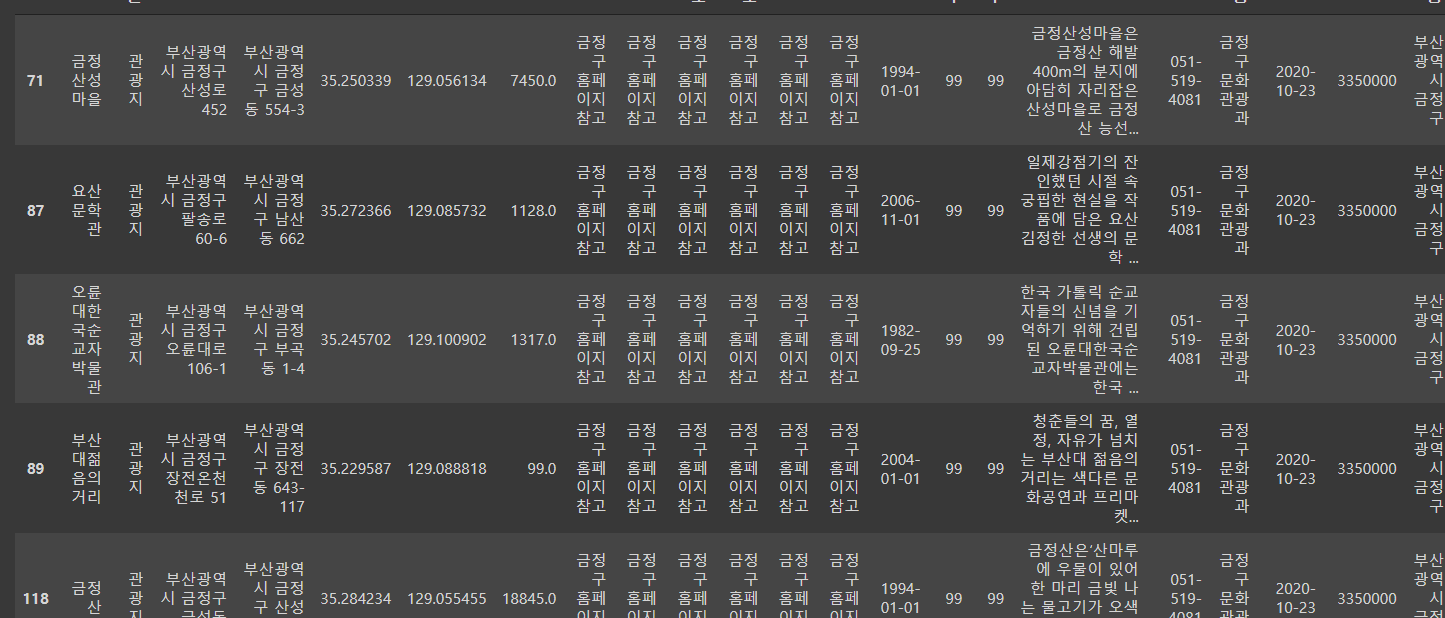

In [ ]:
df_busan = df.loc[df['제공기관명'] == '부산광역시 금정구']
df_busan

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
71,금정산성마을,관광지,부산광역시 금정구 산성로 452,부산광역시 금정구 금성동 554-3,35.250339,129.056134,7450.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,1994-01-01,99,99,금정산성마을은 금정산 해발 400m의 분지에 아담히 자리잡은 산성마을로 금정산 능선...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
87,요산문학관,관광지,부산광역시 금정구 팔송로 60-6,부산광역시 금정구 남산동 662,35.272366,129.085732,1128.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,2006-11-01,99,99,일제강점기의 잔인했던 시절 속 궁핍한 현실을 작품에 담은 요산 김정한 선생의 문학 ...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
88,오륜대한국순교자박물관,관광지,부산광역시 금정구 오륜대로 106-1,부산광역시 금정구 부곡동 1-4,35.245702,129.100902,1317.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,1982-09-25,99,99,한국 가톨릭 순교자들의 신념을 기억하기 위해 건립된 오륜대한국순교자박물관에는 한국 ...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
89,부산대젊음의거리,관광지,부산광역시 금정구 장전온천천로 51,부산광역시 금정구 장전동 643-117,35.229587,129.088818,99.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,2004-01-01,99,99,"청춘들의 꿈, 열정, 자유가 넘치는 부산대 젊음의 거리는 색다른 문화공연과 프리마켓...",051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
118,금정산,관광지,부산광역시 금정구 금성동,부산광역시 금정구 산성로,35.284234,129.055455,18845.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,1994-01-01,99,99,금정산은‘산마루에 우물이 있어 한 마리 금빛 나는 물고기가 오색구름을 타고 하늘에서...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
119,범어사,관광지,부산광역시 금정구 범어사로 250,부산광역시 금정구 청룡동 546,35.283043,129.067621,3513.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,1966-01-01,99,99,범어사는 역사적으로 많은 고승대덕을 길러내고 선승을 배출한 수행사찰로 오랜 전통과 ...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
120,회동수원지,관광지,부산광역시 금정구 오륜대로258,부산광역시 금정구 오륜동 353-2,35.247073,129.115753,2017.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,2010-01-01,99,99,조선시대부터 아름다운 풍경으로 유명한 회동수원지는 금정구를 대표하는 도심 속 힐링 ...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
121,서동미로시장,관광지,부산광역시 금정구 서동로141번길 16,부산광역시 금정구 서동 341-10,35.215870,129.102466,20000.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,2014-01-01,99,99,서동미로시장은 아름다운 길(美路)이라는 의미이자 골목마다 형성된 상권이 미로같다 하...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
122,스포원파크,관광지,부산광역시 금정구 체육공원로399번길 324,부산광역시 금정구 두구동 1641,35.289121,129.107043,99.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,2014-01-01,99,99,스포원파크는 기존의 경기장과는 달리 ‘공원’과 ‘개방’의 개념을 도입한 ‘공원형 경...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
124,한국이슬람부산성원,관광지,부산광역시 금정구 금단로 113-13,부산광역시 금정구 남산동 30-1,35.259986,129.092256,99.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,1980-09-30,99,99,"부산의 유일한 한국이슬람 부산성원은 이슬람 신자들에게는 네트워킹 장이자 쉼터로, 지...",051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구


**문제 1-5. 데이터프레임의 특정 레코드 및 필드에 대해 그룹화하기**
---

관광지 마다 나와있는 column 값이 너무 많은것 같습니다.. 

column 값이 생각보다 많으면 보는데 불편함을 느낄 수도 있습니다.  
보기 편한 기준만으로 세부그룹을 만들어 다시 검색해봅시다.  


데이터프레임 내 특정 column 값을 가지고 세부 그룹을 만들 수 있습니다.



> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

위 링크를 참고하신 후,


**df_mini 라는 변수에 순서대로  
관광지명,수용인원수,면적,제공기관명  
..의 column 값을 가지고 있는 세부그룹을 만들어 저장 및 출력 해봅시다.**


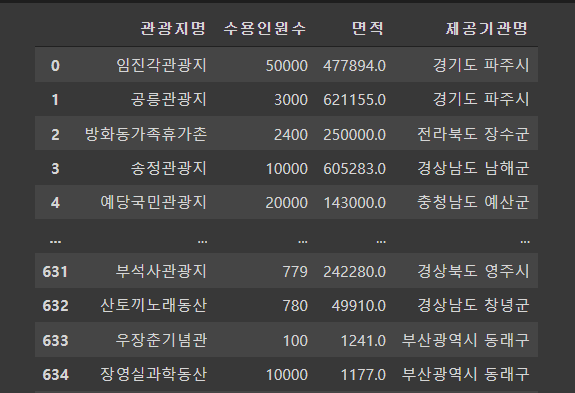

In [ ]:
df_mini = df[['관광지명','수용인원수','면적','제공기관명']]
df_mini

,관광지명,수용인원수,면적,제공기관명
0,임진각관광지,50000,477894.0,경기도 파주시
1,공릉관광지,3000,621155.0,경기도 파주시
2,방화동가족휴가촌,2400,250000.0,전라북도 장수군
3,송정관광지,10000,605283.0,경상남도 남해군
4,예당국민관광지,20000,143000.0,충청남도 예산군
...,...,...,...,...
631,부석사관광지,779,242280.0,경상북도 영주시
632,산토끼노래동산,780,49910.0,경상남도 창녕군
633,우장춘기념관,100,1241.0,부산광역시 동래구
634,장영실과학동산,10000,1177.0,부산광역시 동래구


**문제 1-6.데이터프레임의 그룹화에 따른 평균값,최대값 구하기(2문제)**
---

앞서,  
전체 데이터프레임에 대해  
세부그룹을 만들어 보았습니다.

이 세부그룹에 대하여,  
평균값,구간합,최대,최소값 등을 구할 수 있습니다.

전국에서 규모가 가장 큰 관광지는 어디일까요?



> https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html  
(Aggregation 항목을 참고해주세요.)  

앞서 구한 세부 그룹 df_mini에 대해서,  
**최대값을 구해봅시다.**


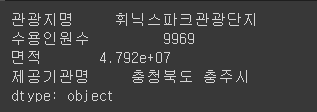

In [ ]:
df_mini.max()

관광지명     휘닉스파크관광단지
수용인원수         9969
면적       4.792e+07
제공기관명     충청북도 충주시
dtype: object

또한,  
**이 세부 그룹에 대하여,  
'제공기관명' 기준에 따른  
평균값을 구해 봅시다.**  

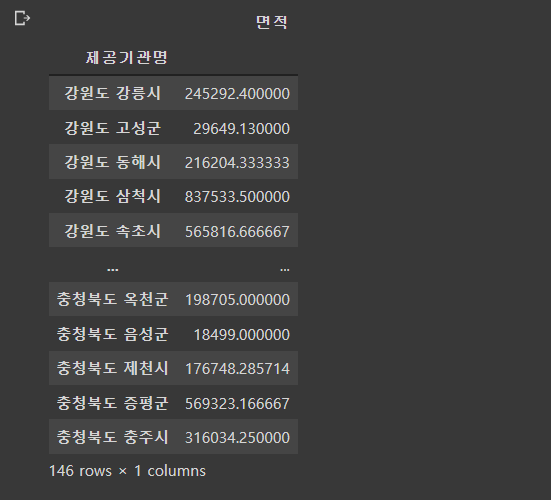

In [ ]:
df_mini.groupby(['제공기관명']).mean()

,면적
제공기관명,
강원도 강릉시,245292.400000
강원도 고성군,29649.130000
강원도 동해시,216204.333333
강원도 삼척시,837533.500000
강원도 속초시,565816.666667
...,...
충청북도 옥천군,198705.000000
충청북도 음성군,18499.000000
충청북도 제천시,176748.285714


**문제 1-7.데이터프레임의 column 값을 함수를 이용하여 선택하기**
---

데이터프레임의 column 값을 앞서 다룬
**.loc 메소드**를 활용하여 선택할 때,  
lambda를 활용하여 조건에 따른 column값을 필터링 할 수 있습니다.



> https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html  
(Selection by Callable 항목을 참고해주세요.)

위 링크를 참고하여,  

**'면적'이 4000000 보다 큰 레코드를 출력해봅시다.**




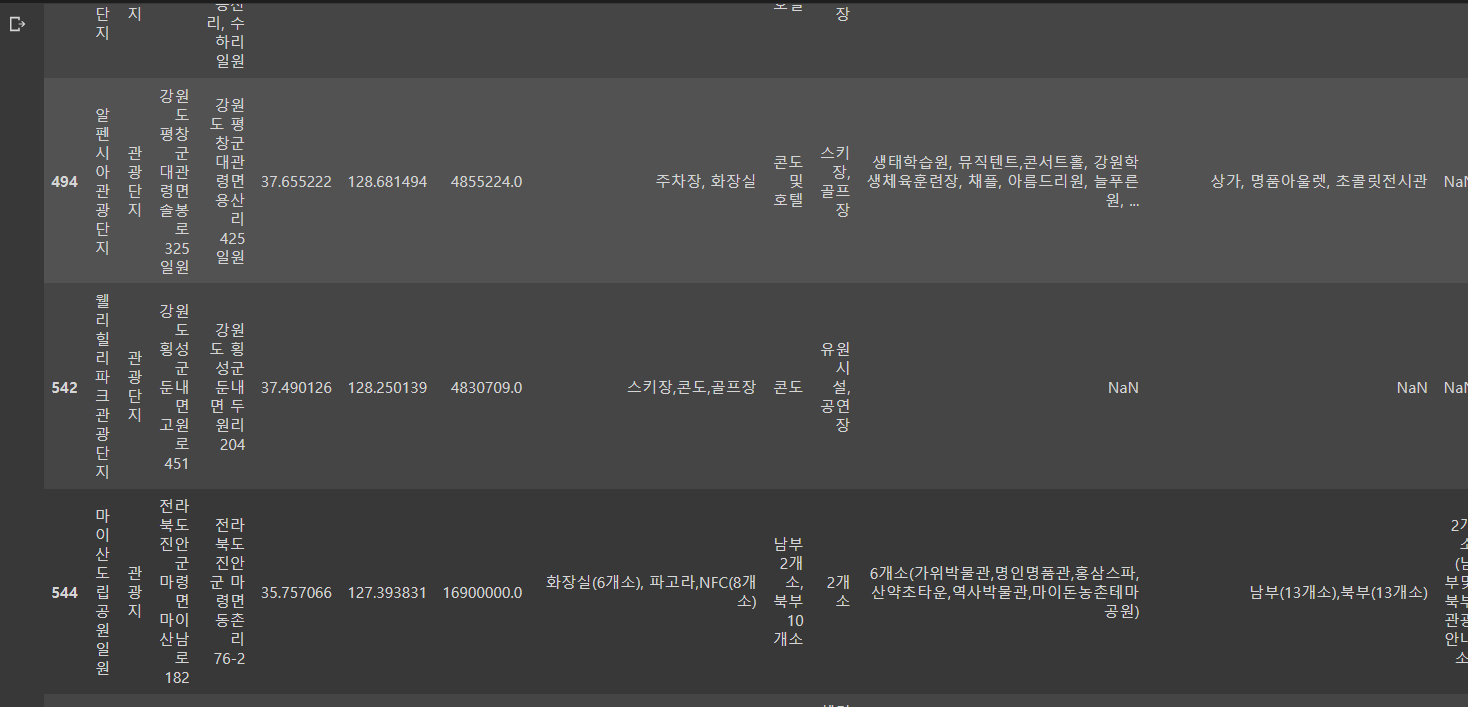

In [ ]:
df.loc[lambda df: df['면적'] > 4000000, :]

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
33,담양호국민관광지,관광지,NaN,전라남도 담양군 용면 월계리 149-67,35.403522,126.996118,47920000.0,"관리사무소, 공중화장실, 전망대, 정수장, 주차장, 도로등","국민숙사(해피랜드호텔), 펜션(오쑈) 등",운동시설지구,"조경 및 휴게시설, 용마루길, 추월산 등산로","목포맛집, 수정횟집, 초원의집","가마골생태공원, JK통나무펜션단지(비호재지구)",1988-11-29,10000,500,"담양호 국민관광지는 영산강 시원지인 가마골생태공원(용소)과 청정하고 맑은 담양호, ...",061-380-2793,담양군청 녹색관광과(가마골생태공원담당),2021-06-29,4850000,전라남도 담양군
216,통도사,관광지,경상남도 양산시 하북면 통도사로 108,경상남도 양산시 하북면 지산리 583,35.498536,129.050951,16855179.0,http://tongdosa.or.kr/index.php,NaN,NaN,http://tongdosa.or.kr/bbs/content.php?co_id=me...,http://tongdosa.or.kr/bbs/content.php?co_id=me...,NaN,2000-01-01,50000,1500,http://tongdosa.or.kr/bbs/content.php?co_id=me...,055-382-7182,통도사,2021-07-27,5380000,경상남도 양산시
452,휘닉스파크관광단지,관광단지,강원도 평창군 봉평면 태기로 174 일원,강원도 평창군 봉평면 면온리 1095-1 일원,37.581373,128.327331,4233000.0,"주차장, 화장실",콘도 및 호텔,"스키장, 골프장","유스호스텔, 극장, 워터파크, 컨벤션센터",상가(센타프라자),NaN,1998-10-01,38000,2800,"스키, 스노우빌리지, 워터파크 등 다양한 레저시설을 갖추고 있으며 사계절 이용 가능...",033-330-2746,강원도 평창군청,2020-11-25,4280000,강원도 평창군
487,무주 덕유산 리조트,관광지,"전라북도 무주군 설천면 만선로 185, (심곡리)",전라북도 무주군 설천면 심곡리 산43-15,35.889797,127.731389,7018181.0,화장실+주차장,관광호텔+가족호텔+호스텔,골프장+스키장,NaN,관광식당,전용숙소,1990-12-22,45000,10000,"덕유산의 수려한 자연환경을 느낄 수 있으며, 오스트리아풍의 건물들로 이루어진 산악형...",063-320-2558,전라북도 무주군청,2020-12-18,4740000,전라북도 무주군
493,용평관광단지,관광단지,NaN,"강원도 평창군 대관령면 용산리, 수하리 일원",37.660871,128.666483,16219204.0,"주차장, 화장실",콘도 및 호텔,"스키장, 골프장",NaN,"상가, 음식점, 카페 등",NaN,2001-02-21,64000,2837,"버치힐GC, 워터파크, 그린피아콘도, 드래곤밸리호텔 등 숙박시설 및 유원시설, 골프...",033-330-2746,강원도 평창군청,2020-11-25,4280000,강원도 평창군
494,알펜시아관광단지,관광단지,강원도 평창군 대관령면 솔봉로 325 일원,강원도 평창군 대관령면 용산리 425 일원,37.655222,128.681494,4855224.0,"주차장, 화장실",콘도 및 호텔,"스키장, 골프장","생태학습원, 뮤직텐트,콘서트홀, 강원학생체육훈련장, 채플, 아름드리원, 늘푸른원, ...","상가, 명품아울렛, 초콜릿전시관",NaN,2005-09-23,40000,2800,"사계절 복합 리조트 시설을 갖추고 있음. 골프지구, 리조트빌리지지구, 스키지구, 동...",033-330-2746,강원도 평창군청,2020-11-25,4280000,강원도 평창군
542,웰리힐리파크 관광단지,관광단지,강원도 횡성군 둔내면 고원로 451,강원도 횡성군 둔내면 두원리 204,37.490126,128.250139,4830709.0,"스키장,콘도,골프장",콘도,"유원시설, 공연장",NaN,NaN,NaN,2005-06-15,10000,500,"스키장, 골프장, 곤돌라, 콘도",1544-8833,신안종합리조트,2021-07-22,4260000,강원도 횡성군
544,마이산도립공원 일원,관광지,전라북도 진안군 마령면 마이산남로 182,전라북도 진안군 마령면 동촌리 76-2,35.757066,127.393831,16900000.0,"화장실(6개소), 파고라,NFC(8개소)","남부 2개소, 북부 10개소",2개소,"6개소(가위박물관,명인명품관,홍삼스파,산약초타운,역사박물관,마이돈농촌테마공원)","남부(13개소),북부(13개소)",2개소(남부및북부관광안내소),1979-10-16,6500,862,마이산은 암마이봉(686m)과 수마이봉(680m)으로 진안읍 단양리와 마령면 동촌리...,063-430-8752,전라북도 진안군,2020-06-02,4730000,전라북도 진안군
545,용담호및주변시설,관광지,전라북도 진안군 안천면 안용로 793,전라북도 진안군 안천면 삼락리 1179-2,35.945933,127.525673,31400000.0,"휴게소 및 망향의동산(6개소), 화장실(5개소)",용담호주변 펜션단지(15개소),"체련공원4개소(용담,안천,상천,정천)","4개소(용담댐물문화관, 용담호사진관, 용담가족테마공원, 용담호자연생테습지공원)",없음,1개소(용담댐물관리단),2001-10-13,200,100,"댐으로 만들어진 인공호수로써 높이 70m, 길이 498m, 저수량이 8억1,500톤...",063-430-4263,한국수자원공사,2020-06-02,4730000,전라북도 진안군
546,운장산자연휴양림,관광지,전라북도 진안군 정천면 휴양림길 77,전라북도 진안군 정천면 갈용리 산 183,35.888459,127.432788,19580000.0,"도로, 관리사무소, 공중화장실3개소, 오수처리장",객실 26,없음,야영장 20개,관리사무소,관리사무소,2000-01-01,400,200,약7㎞에 달하는 운장산 계곡은 원시림과 옥류수가 연중 흐르고 순환임도와 연접하고 여...,063-432-1193,국림자연휴양관리사무소,2020-06-02,4730000,전라북도 진안군


**문제 1-8.데이터프레임의 정규표현식**
---

전국에 있는 관광지 정보를 다 모아 놓으니,  
그 데이터 크기도 크고 앞서 column 필터링을 적용해도  
검색하거나 걸러낼 column을 일일이 쓰기 힘듭니다.  

그런데,  
pandas의 filter 메소드를 활용하면,  
column 값을 다 type 하지 않고도 필터링 할 수 있습니다.


> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html  
(regex 참고)

위 링크를 참고하시고,

**이 filter 메소드의  
regex[Regular Expression](정규 표현식)을 이용해,  
모든 column중 "주"가 들어가는 column을 가져와봅시다.** 

모든 column 중 아무리 긴 column이라도  
"주" 한글자가 들어가면 필터링 됩니다.

주소를 검색할 때 편하겠네요.

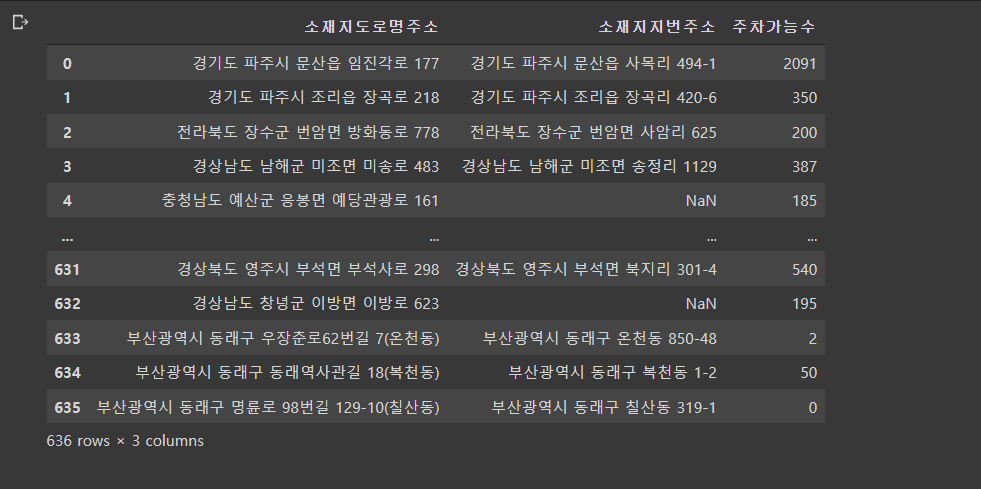

In [ ]:
df.filter(regex ='[주]')

,소재지도로명주소,소재지지번주소,주차가능수
0,경기도 파주시 문산읍 임진각로 177,경기도 파주시 문산읍 사목리 494-1,2091
1,경기도 파주시 조리읍 장곡로 218,경기도 파주시 조리읍 장곡리 420-6,350
2,전라북도 장수군 번암면 방화동로 778,전라북도 장수군 번암면 사암리 625,200
3,경상남도 남해군 미조면 미송로 483,경상남도 남해군 미조면 송정리 1129,387
4,충청남도 예산군 응봉면 예당관광로 161,NaN,185
...,...,...,...
631,경상북도 영주시 부석면 부석사로 298,경상북도 영주시 부석면 북지리 301-4,540
632,경상남도 창녕군 이방면 이방로 623,NaN,195
633,부산광역시 동래구 우장춘로62번길 7(온천동),부산광역시 동래구 온천동 850-48,2
634,부산광역시 동래구 동래역사관길 18(복천동),부산광역시 동래구 복천동 1-2,50


# HW 2. 데이터의 시각화 기초 및 논리(Logic) 프로그램 활용
---

**matplotlib 사용 및 csv 파일**
---

앞서 주어진 데이터를 바탕으로,  
시각적인 그래프로 표현해 봅시다.  

데이터 시각화를 위한 python의 matplotlib를 활용해  
해당 조건에 맞게 그래프를 출력해 볼 수 있습니다.  

해당 라이브러리 matplotlib의 간단한 예제입니다.   

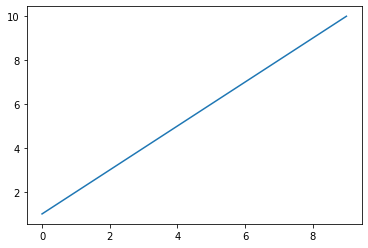

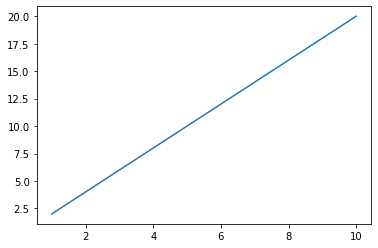

In [ ]:
import matplotlib.pyplot as pyplot #matplotlib setup
import numpy as np #대규모 array를 위한 numpy
a = [1,2,3,4,5,6,7,8,9,10]
pyplot.plot(a) #하나의 리스트를 가지고 그래프를 그리면, 
#x축은 자동생성되고 리스트 안 원소들로 y축 범위가 그려집니다.
pyplot.show() #그래프 출력

b = [2,4,6,8,10,12,14,16,18,20] #두개의 리스트를 가지고 그래프를 그릴땐,
#두 리스트의 원소의 개수가 같아야합니다.
pyplot.plot(a,b) #plot 함수에 값을 하나만 주면 y축으로 생성됩니다.
#list b = y축, list a = x축
pyplot.show()


**csv 파일 추가(필수)**
--- 
해당 2장에선 다른 csv파일을 사용할 수 있습니다.  
따라서,파일 변경과 변수 사용에 유의해주시길 바랍니다.    

전국 관광지 데이터프레임 = "df"  
부산광역시 북구 산책로 데이터프레임 = "ds"     
변수를 사용중입니다.


> https://www.data.go.kr/data/15088391/fileData.do   
**(부산광역시 북구 산책로 데이터)**




**문제 2-0:특정 조건에 따른 그래프 출력하기**
---

크기가 비교적 작은 데이터를 가진 csv 파일을 활용하여 그래프를 만들어 봅시다.  

앞에 첨부한 "부산광역시 북구 산책로"의 csv 파일을 활용하여,  
**거리(킬로미터) 가 Y축에 기준이 되는 그래프를 출력해봅시다.**

추가적으로,  
시각화된 그래프의 x,y축이 어떠한 기준인지 출력해봅시다.  

**(y축은 거리(킬로미터),x축은 데이터 인덱스로 라벨링하시면 됩니다.)  
(데이터프레임을 리스트로 변환하여 그래프 출력시 활용하시면 됩니다!)**


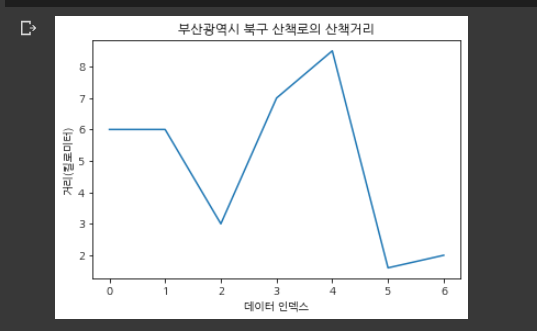

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
pyplot.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (42.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and di

위 코드는 matplotlib의 한글 폰트 깨짐을  
방지하기 위한 코드입니다.  



> https://teddylee777.github.io/colab/colab-korean  
(참고해주시길 바랍니다.)


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

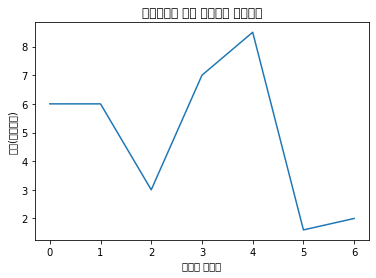

In [ ]:
ds = pd.read_csv('부산광역시 북구_산책로_20210913.csv',encoding = 'cp949')
ds_list = ds['거리(킬로미터)'].values.tolist()
pyplot.plot(ds_list)
pyplot.title('부산광역시 북구 산책로의 산책거리')
pyplot.xlabel('데이터 인덱스')
pyplot.ylabel('거리(킬로미터)') 
pyplot.show()

**문제 2-1:여러개의 그래프를 겹쳐보기** 
---

한번에 여러개의 그래프를 볼 수도 있습니다.  

간단하게 plot() 함수를 여러번 사용하여 한개의 그래프 화면에 다 표현할 수 있습니다.  
그런데,이때는 여러개의 그래프가 서로 구분이 안되기 때문에  
각 그래프에 라벨링을 한 후,    
legend() 함수를 사용하면 그래프간 서로 구별이 가능합니다.  
  
**1부터 10까지의 랜덤 데이터중 7개의 정수를 가져오는 배열을 선언하여,  
앞서 이용한 데이터 ds_list의 그래프와 겹쳐봅시다.**  


> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html  
(legend() 함수 참고)



(변수 선언은 자유입니다.  
x축은 데이터인덱스,y축은 데이터로 라벨링하고  
legend 함수를 오른쪽 위의 위치로 사용하여 첫번째 그래프와 두번째 그래프를 구별해주세요.)



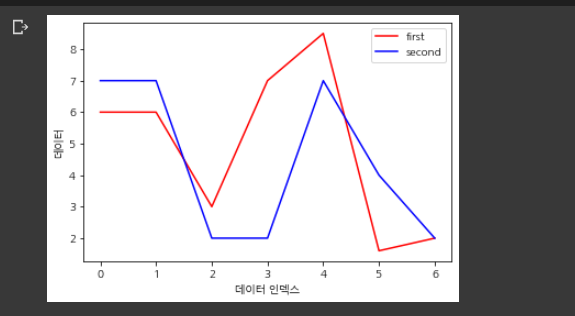

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45937 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_

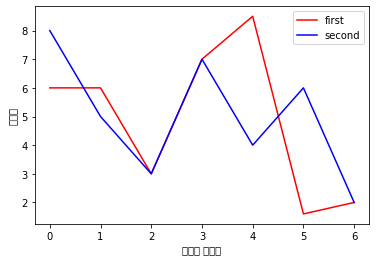

In [ ]:
data_a =np.random.randint(1,10,size = 7)
pyplot.plot(ds_list,'r',label = 'first')
pyplot.plot(data_a,'b',label = 'second')
pyplot.xlabel('데이터 인덱스')
pyplot.ylabel('데이터')
pyplot.legend(loc='upper right')
pyplot.show()

**문제 2-2:그래프의 어노테이션(Annotation)**
---

matplotlib의 annotate 라는 기능은,  
그래프 내 한 지점을 문자열을 통해 가르켜주는 기능입니다.

예를 들면,  
그래프 내 최솟값을 화살표로 가르켜 이 지점이 최솟값이라 표시 할 수 있습니다.  


> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html  
(Annotate 참고)  

**사진과 같이 ds_list 그래프의 최댓값을 표시해봅시다.  
(최대값의 좌표는 탐색을 통해 직접 구하시길 바랍니다.)**



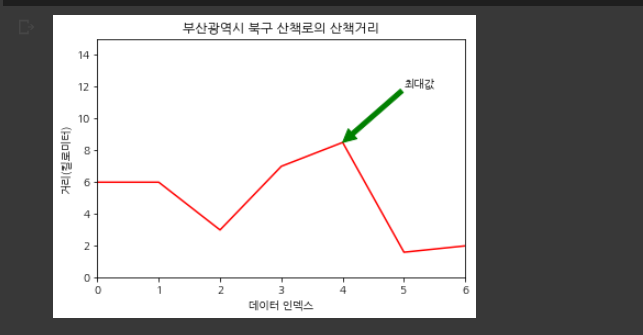

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_

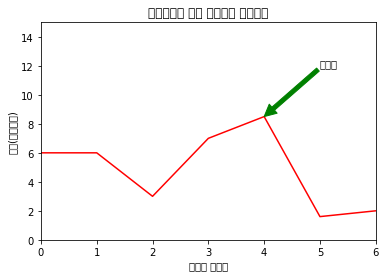

In [ ]:
pyplot.plot(ds_list,'r')
max_list = ds_list[0]
for i in range(len(ds_list)):
  if(max_list < ds_list[i]):
    max_list_y = ds_list[i]
    max_list_x = i
pyplot.annotate('최대값',xy=(max_list_x,max_list_y),xytext=(5,12),arrowprops={'color':'green'})
pyplot.title('부산광역시 북구 산책로의 산책거리')
pyplot.xlabel('데이터 인덱스')
pyplot.ylabel('거리(킬로미터)')
pyplot.axis((0,6,0,15))
pyplot.show()

**문제 2-3:여러개의 그래프를 한번에 출력하기**
---

한 그래프화면에 여러개의 그래프를 겹치는 것보다,  
상황에 따라 여러개의 그래프를 개별적으로 접하는게 분석력이 높을 수 있습니다.  

matplotlib의 subplot를 사용하면,  
여러개의 그래프를 사용자 입력에 맞게 출력할 수 있습니다.  



> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html  
(subplot 참고)  

**앞서 df 변수에 저장되어 있는 데이터프레임에서,  
주차가능수와 수용인원수에 대해서,  
row 값의 범위가 0부터 6까지의 데이터를 가져와,  
정렬하여 그래프 생성하시면 됩니다.**



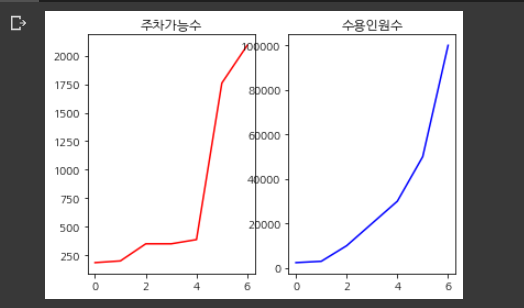

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_

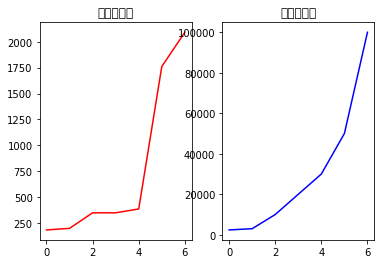

In [ ]:
df_list1 = df.loc[0:6,'주차가능수'].values.tolist()
df_list2 = df.loc[0:6,'수용인원수'].values.tolist()
df_list1 = list(map(int, df_list1))
df_list1.sort()
df_list2 = list(map(int, df_list2))
df_list2.sort()
pyplot.subplot(1,2,1)
pyplot.plot(df_list1,'r')
pyplot.title('주차가능수')
pyplot.subplot(1,2,2)
pyplot.plot(df_list2,'b')
pyplot.title('수용인원수')
pyplot.show()

**문제 2-4:히스토그램 생성하기**
---

matplotlib에선 다양한 데이터의 시각화를 지원합니다.  
히스토그램,산점도 그래프,파이 차트,막대 그래프 등 다차원 그래프도 존재합니다.  

그 중 히스토그램에 대해 간단하게 구현해봅시다.
> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
(히스토그램 참고)

**df 데이터프레임 변수의 '수용인원수' column의 데이터중,  
row값이 245부터 272까지의 데이터를 가지고 와  
아래와 같이 히스토그램을 생성해봅시다.**


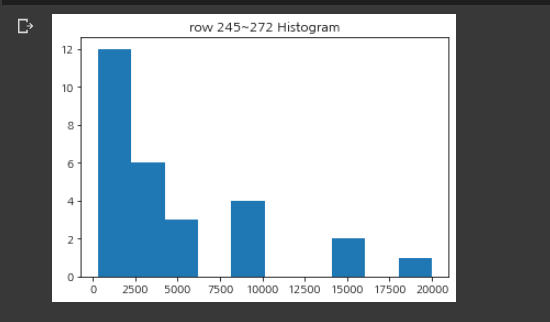

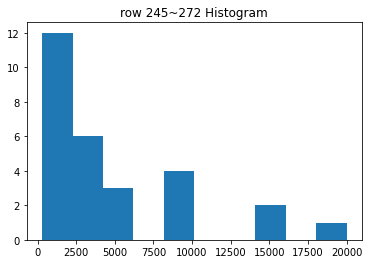

In [ ]:
df_list3 = df.loc[245:272,'수용인원수'].values.tolist()
df_list3 = list(map(int,df_list3))
df_list3.sort()
pyplot.hist(df_list3)
pyplot.title('row 245~272 Histogram')
pyplot.show()

#HW 3.데이터에 집합(Set)연산 적용하기(교집합,차집합,합집합 등),구글드라이브랑 연동하기,구글드라이브로 데이터 읽기 및 저장하기
---

이번 장에서는 Google Colab과 Google drive를 연동하는 법에 대해서 다루겠습니다.  
> https://leti-lee.tistory.com/3
(참고해주세요!)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


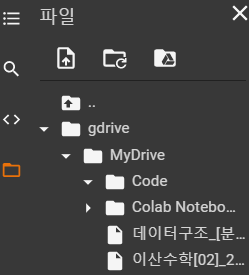

기본적으로 위와 같이 Google Drive와 연동한 뒤,  
폴더를 하나 생성하여  
우리가 다룬 데이터를 저장해보겠습니다.  
(작성자 기준 "Code"라는 폴더를 생성하였습니다.)


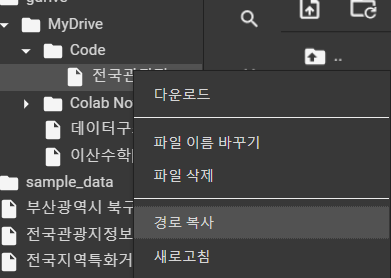

해당 디렉터리의 파일에 커서를 두고,  
우클릭을 하면 해당 파일의 경로가 복사됩니다.  

**문제 3-0:구글 드라이브에서 파일 가져오기**
---

**앞서 다룬 csv 파일('전국관광지정보표준데이터.csv')을 
구글 드라이브에서 가져와 레코드 10개를 출력해봅시다.**  
(무작위로 가져오셔도 됩니다.)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Code/전국관광지정보표준데이터.csv', encoding='cp949')
df.tail(10)

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
626,헌인릉,관광지,서울특별시 서초구 헌인릉길 36-10,서울특별시 서초구 내곡동 산 13-1,37.465145,127.082645,247.0,화장실+주차장,NaN,NaN,NaN,NaN,NaN,1970-05-26,500,20,사적 제 194호인 이곳은 동쪽의 헌릉과 서쪽의 인릉으로 구성되어 있다. 헌릉은 조...,02-440-0347,문화재청,2019-08-07,3210000,서울특별시 서초구
627,매헌 윤봉길의사 기념관,관광지,서울특별시 서초구 매헌로 99,서울특별시 서초구 양재동 236,37.471217,127.036736,2627.0,화장실+주차장,NaN,NaN,NaN,NaN,NaN,1988-12-01,400,50,윤봉길의사의 업적과 살신성인 정신의 높은 뜻을 선양하고 계승 발전시키키 위하여 19...,02-577-9932,국가보훈처,2019-08-07,3210000,서울특별시 서초구
628,고투몰,관광지,서울특별시 서초구 신반포로 200,서울특별시 서초구 잠원동 68-17,37.506598,127.005410,15601.0,화장실,NaN,NaN,NaN,NaN,NaN,1974-04-30,20000,0,"고속터미널 지하상가를 일컫는 고투몰은 카페, 음식점, 꽃시장 등 다양한 먹거리와 볼...",02-535-8182,강남터미널지하쇼핑몰,2019-08-07,3210000,서울특별시 서초구
629,"세빛섬, 반포대교 달빛무지개분수",관광지,서울특별시 서초구 올림픽대로 683,서울특별시 서초구 반포동 650,37.512028,126.995269,10421.0,화장실+주차장,NaN,수상컨벤션센터,"미디어아트갤러리, 전망대",NaN,NaN,2014-10-15,20000,635,"세빛섬은 ''세 개의 빛나는 섬''이라는 의미로, 세계 최초로 물 위에 떠 있는 부...",1566-3433,효성티앤씨,2019-08-07,3210000,서울특별시 서초구
630,삼성딜라이트,관광지,서울특별시 서초구 서초대로74길 11,서울특별시 서초구 서초동 1320-10,37.496609,127.026902,196561.0,화장실,NaN,NaN,NaN,NaN,NaN,2015-09-12,100,888,삼성딜라이트는 테마별로 꾸며진 최신 디지털 기술을 통해 미래의 새로운 생활패턴을 체...,02-2255-2277,삼성,2019-08-07,3210000,서울특별시 서초구
631,부석사관광지,관광지,경상북도 영주시 부석면 부석사로 298,경상북도 영주시 부석면 북지리 301-4,36.994497,128.679619,242280.0,"도로, 보행자도로, 광장, 안내소, 주차장, 화장실 등",-,-,"피크닉마당, 부석사 이야기길, 의상대사 스토리원 등",상가 등,-,2012-06-11,779,540,소백산 자연환경을 배경으로 한 천년고찰 부석사를 직접 참여하고 머무르는 다양한 체험...,054-639-6618,영주시,2020-07-20,5090000,경상북도 영주시
632,산토끼노래동산,관광지,경상남도 창녕군 이방면 이방로 623,NaN,35.576684,128.386189,49910.0,안내소(매표소)+주차장+화장실,NaN,롤링미끄럼틀+레일썰매장+어린이놀이터,작은동물원+토끼먹이체험장,NaN,NaN,2013-11-15,780,195,국민 동요 ‘산토끼’의 유래지역인 창녕군 이방면에 어른들에게는 어린 시절의 추억을 ...,055-530-1533,경상남도 창녕군청,2020-07-20,5410000,경상남도 창녕군
633,우장춘기념관,관광지,부산광역시 동래구 우장춘로62번길 7(온천동),부산광역시 동래구 온천동 850-48,35.213515,129.072018,1241.0,화장실,NaN,NaN,NaN,NaN,NaN,1999-10-21,100,2,씨 없는 수박으로 우리 모두에게 잘 알려진 세계적 육종학자인 故우장춘박사의 탄생 1...,051-550-6602,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구
634,장영실과학동산,관광지,부산광역시 동래구 동래역사관길 18(복천동),부산광역시 동래구 복천동 1-2,35.209163,129.089669,1177.0,화장실(2동),NaN,NaN,NaN,NaN,NaN,2009-10-15,10000,50,동래출신 조선시대 세종당시 최고의 과학자인 장영실이 만든 세계최고의 옛 천문의기 1...,051-550-6604,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구
635,박차정의사생가,관광지,부산광역시 동래구 명륜로 98번길 129-10(칠산동),부산광역시 동래구 칠산동 319-1,35.201696,129.090397,379.0,없음,NaN,NaN,NaN,NaN,NaN,2005-07-08,50,0,박차정의사 생가 복원사업은 항일독립운동가이자 한국여성해방운동의 선구자인 박차정의사의...,051-860-7880,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구


**문제 3-1:구글 드라이브에 파일 업로드하기**
---

앞서 만든 데이터프레임(2-1 참고)을 구글드라이브에 업로드 해봅시다.  


In [ ]:
df_upload = pd.DataFrame(df_list1)
print(df_upload)
!ls /gdrive/MyDrive/Code/test.txt


      0
0   185
1   200
2   350
3   350
4   387
5  1760
6  2091
ls: cannot access '/gdrive/MyDrive/Code/test.txt': No such file or directory


**문제 3-2:데이터 집합 연산 적용하기[합집합]**
---

python에서는 set 자료형을 이용하여 집합을 나타낼 수 있습니다.

list를 입력받아 비교하는 list 간의 집합관계를 나타낼 수 있습니다.  
이를 우리가 다루는 데이터프레임에서,  
원하는 정보를 가져와 집합 연산을 적용할 수 있습니다.  

첫번쨰로,  
합집합(Union)에 대해서 알아 봅시다.  

**앞서 다룬 df 데이터프레임에서,   
'수용인원수'와 '주차가능수'에 대한 데이터중 임의로 10개를 가져와,    
합집합 연산을 하여 list로 출력 해봅시다.**  
(변수 사용은 자유입니다.)  


In [ ]:
df_first = df.loc[0:10,'주차가능수'].values.tolist()
df_second = df.loc[0:10,'수용인원수'].values.tolist()
union = list(set(df_first) | set(df_second))
print(union)

['350', '2400', '35', '50000', '20000', '100', '30000', '3000', '185', '50', '10000', '200', '387', '2091', '91', '100000', '20', '1760', '0', '3300', '1000']


**문제 3-3:데이터 집합 연산 적용하기[교집합]**
---

**문제 3-4:데이터 집합 연산 적용하기[차집합]**
---

**문제 3-5:데이터 집합 연산 적용하기[대칭차집합]**
---

#HW 4.그래프 생성하기(노드 및 엣지 추가),노드/엣지 속성넣기
---

#HW 5.방향성 그래프 생성하기,그래프 분석 및 시각화하기
---

#HW 6.데이터 프레임에서 그래프 형태로 변환하기
---

#HW 7.그래프 알고리즘 적용하기(그래프 컬러링,최단거리,중심노드 찾기)
---

#HW 8.합성함수 만들기 및 적용
---

#HW 9.순열 및 조합사용하여 신규 데이터 생성
---

#HW 10.확률 계산,확률 분포(푸아송,노멀,powerlaw),기대값 분산
---